In [21]:
##ReadingPlottingCSV
##Written by Tim Mose and Rebecca Rapf
##June 3, 2021

###import multiple files of Langmuir trough data and plot them
###Export plots to png files

##import relevant libraries
import pandas as pd
import numpy as np
import glob
import matplotlib as mpl
import matplotlib.pyplot as plt 
import os
#import csv


##Parameters to be changed for each analysis##
FilePath = "/Users/rebeccarafp/Documents/RapfLabPython/Water/" ##currently local only, will change to read from google drive
OutFolder = "Processed"
#FileName = "210528_1419_MA" #name only not file extension
FileType = "xlsx" #pick from "xlsx" or "csv"
Surfactant = "myristic_water" #name of surfactant and/or conditions
StockConcSame = "yes" #"yes" or "no" if same concentration was used for each run


StockConc = 4.18 #mM ignore old comment #(mg/mL) of chloroform stock solution
MM = 284.48 #molecular weight in (g/mol)
VolDeposit_uL = 20 #volume stock solution deposited in 
########

##File-Specific Parameters####
header_length = 43 #skip the first 43 lines in the file
#########

##Constants Library##
AVOGADRO = 6.022*10**23
uL_CONVERSION = 10**6 #number of uL in 1 L
Ang_CONVERSION = 10**10 #number of Angstroms in 1 m
cm_CONVERSION = 10**2 #number of cm in 1 m
cm2_to_Ang2 = Ang_CONVERSION**2/cm_CONVERSION**2
#print(cm2_to_Ang2)
###########

####Calculate number of molecules deposited###
VolDeposit_L = VolDeposit_uL/uL_CONVERSION
AmountDeposit = ((StockConc/1000))*(VolDeposit_L)
NumMolecules = AmountDeposit*AVOGADRO
#print(NumMolecules)

##Set file path to where data is being held locally
os.chdir(FilePath)
print(os.getcwd())


/Users/rebeccarafp/Documents/RapfLabPython/Water


In [25]:
files = sorted(glob.glob("21"+"*"+FileType))
files.sort(key=os.path.getmtime)
print(files)

num_files = len(files)

AllFiles = pd.DataFrame()

for entry in range(len(files)):
    name = files[entry]
    outname = name[:-(len(FileType)+1)]
    #print(name)
    if FileType == "csv":
        CurrFile = pd.read_csv(files[entry],skiprows = header_length)
    elif FileType == "xlsx":
        #CompFile = files[entry]
        #print(CompFile)
        CurrFile = pd.read_excel(files[entry],skiprows = header_length)
        #print(CurrFile)
        #print("excel")
        CurrFile = CurrFile.rename(columns={CurrFile.columns[3]: "A_cm2"})
        #print(CurrFile)
        
        A_Ang2 = (CurrFile["A_cm2"]*cm2_to_Ang2)
        CurrFile.insert(4, "A_Ang2", A_Ang2)

        MMA=CurrFile["A_Ang2"]/NumMolecules
        
        
        IndFile = pd.DataFrame(columns = [outname+"_Acm2",outname+"_P",outname+"_MMA"])
        IndFile[outname+"_Acm2"]=CurrFile["A_cm2"]
        IndFile[outname+"_P"]=CurrFile["P1[mN/m]"]
        IndFile[outname+"_MMA"]=MMA
        
        AllFiles[outname+"_Acm2"]=CurrFile["A_cm2"]
        AllFiles[outname+"_P"]=CurrFile["P1[mN/m]"]
        AllFiles[outname+"_MMA"]=MMA
        
        IndFile.to_csv(OutFolder+"/"+outname+"_Processed.csv")
 
AllFiles.to_csv(OutFolder+"/"+Surfactant+"_AllProcessed.csv")

#####Read in a single Langmuir trough file
###File Handling -- Reads in the file of interest into a Pandas DataFrame ###
# if "CleanData" in locals():
#     del CleanData #housekeeping for memory reasons

# if FileType == "csv":
#     CompFile = FileName+"."+FileType
#     All=pd.read_csv(CompFile,skiprows = header_length)
# elif FileType == "xlsx":
#     CompFile = FileName+"."+FileType
#     #print(CompFile)
#     All=pd.read_excel(CompFile,skiprows = header_length)
#     #print("excel")
# else:
#     print("Unrecognized File Type, choose either 'csv' or 'excel'")

# #Renames area column to get rid of formatted superscript issue
# CleanData = All.rename(columns={All.columns[3]: "A_cm2"})

#CleanData


['210601_0931_MA.xlsx', '210602_1048_MA.xlsx', '210602_1218_MA.xlsx', '210528_1419_MA.xlsx']


In [19]:
CleanData.insert(7, "NumMolecules", NumMolecules)
#inserts column with amount of molecules 

A_Ang2 = (CleanData["A_cm2"]*cm2_to_Ang2)
CleanData.insert(4, "A_Ang2", A_Ang2)

MMA=(CleanData["A_Ang2"]/CleanData["NumMolecules"])
CleanData.insert(9, "Mean Molecular Area", MMA)


#CleanData

NameError: name 'CleanData' is not defined

In [20]:
AP = pd.DataFrame(CleanData, columns=(["A_cm2", "P1[mN/m]"]))
AP
#I used AP to abbreviate for area and pressure.

NameError: name 'CleanData' is not defined

In [4]:
APPlot = AP.plot(x="A_cm2", y="P1[mN/m]",legend = None)

APPlot.set_xlabel('Area (cm^2)')
APPlot.set_ylabel("Pressure (mN/m)")

#This gives the basic plot of just Area and pressure without any changes

NameError: name 'AP' is not defined

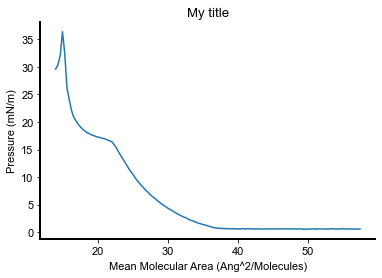

In [24]:
MMAPlot = CleanData.plot(x="Mean Molecular Area", y="P1[mN/m]", legend=None)
#creates plot with axis labels and no legend

MMAPlot.set_xlabel("Mean Molecular Area (Ang^2/Molecules)")
MMAPlot.set_ylabel("Pressure (mN/m)")

plt.title('My title') 
#change value of my title to set the title
plt.savefig('Final_Plot.png', dpi=300, transparent=False, bbox_inches='tight')
#saves the plot in your working directory. Change final plot to name you want
